# **Objetivos**
* Identificar y manejar valores perdidos
* Data Formatting
* Data Normalization (centrar/escalar)
* Data Binning
* Convertir valores categóricos a numéricos

# 1. **Cómo lidiar con missing values**
---
* **Revisar la fuente de los datos**
* **Eliminar los valores perdidos**
    * Eliminar la variable o
    * Eliminar la fila <-- (Cuando no son muchos datos es mejor)
* **Reemplazar los valores perdidos**
    * Reemplazarlos con su media (o puntos similares)
    * Reemplazarlos por su frecuencia
    * Reemplazarlos basado en otras funciones
* **Dejarlo como valores perdidos (no hacer nada)**
---

### Eliminar valores perdidos

`dataframe.dropna([subset=[''], axis=0, inplace=True])`

*subset['price']*: Elegir solo algunas columnas

*axis=0*: Eliminar la fila entera

*axis=1*: Eliminar la columna entera

*inplace=True*: Hacer las modificaciones directamente en el Dataset

---
### Reemplazar valores perdidos

`mean = dataframe['column-name'].mean()`

`dataframe['column-name'].replace(np.nan, mean)`


# **2. Data Formatting**
* Los datos normalmente son recolectados de diferentes lugares y guardados en diferentes formatos.
* Convertir los datos en un mismo estándar permite a los usuarios hacer comparaciones más significativas.
---
### Corregir tipos de datos
Identificar tipos de datos
* `dataframe.dtypes`

Convertir los tipos de datos
* `dataframe.astype(["int"])`

Renombrar columnas
* `df.rename(columns={"city mpg": "city-L/100km"}, inplace=True)`
* `df.columns = ["colum-name1", "colum-name2", "colum-name3",...]`

# **3. Data Normalization**
En ocaciones los datos pueden tener distintos rangos, por lo que pueden influenciar en mayor o menor medida a los resultados.

---
### Enfoques para la nornalización
1. **Escalamiento simple**
$$x_{new} = \frac{x_{old}}{x_{max}}$$
Los valores van de 0 a 1.

`dataframe["length"] = dataframe["length"]/datafrme["length"].max()`

2. **Min-max**
$$x_{new} = \frac{x_{old} - x_{min}}{x_{max}-x_{min}}$$
Los valores van de 0 a 1.

`dataframe["length"] = (dataframe["length"] - dataframe["length"].min())/(datafrme["length"].max() - dataframe["length"].min())`

4. **Z-score (standard score)**
$$x_{new} = \frac{x_{old}-{\mu}}{\sigma}$$
$\mu$ es la media y $\sigma$ es la variación estándar. Los valores van al rededor del 0, normlamente de 3 a -3, pero pueden ser mayores.

`dataframe["length"] = (dataframe["length"] - dataframe["length"].mean())/datafrme["length"].std()`

# **4. Binning**
* Agrupar valores numéricos en bins.
* Convertir valores numéricos en variables categóricos.

---
### Binning Data

`bins = np.linspace(min(df["price"]), max(df["price"]), 4)`

`group_names = ["Low", "Medium", "High"]`

`df["price-binned"] = pd.cut(df["price"].bins, labels=group_names, include_lowest=True)`

---
### Visualizing Binned data
* Histograms


# **5. Categorical to numeric**
Muchos modelos estadísticos no pueden tomar objetos/strings como entrada, así que se agrega una nueva variable para cada categoría única. Luego, se asigna 0 o 1 en cada una de ellas (***one-hot encoding***). Es decir, se crean tantas nuevas columnas en el dataframe como valores distintos en la columna categórica original existan.  

`pd.get_dummies(df["fuel"])`




---
---
# **EJERCICIO**
---
---

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("automobile.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


## 1. Identificar y manejar valores perdidos
---
1. **Convertir '?' a NaN**

In [5]:
import numpy as np

df.replace("?", np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


2. **Evaluar los valores perdidos**
    * `.isnull()`
    * `.notnull()` 

In [6]:
missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
for column in missing_data.columns.tolist():
    print(missing_data[column].value_counts())
    print("")

symboling
False    201
Name: count, dtype: int64

normalized-losses
False    164
True      37
Name: count, dtype: int64

make
False    201
Name: count, dtype: int64

fuel-type
False    201
Name: count, dtype: int64

aspiration
False    201
Name: count, dtype: int64

num-of-doors
False    199
True       2
Name: count, dtype: int64

body-style
False    201
Name: count, dtype: int64

drive-wheels
False    201
Name: count, dtype: int64

engine-location
False    201
Name: count, dtype: int64

wheel-base
False    201
Name: count, dtype: int64

length
False    201
Name: count, dtype: int64

width
False    201
Name: count, dtype: int64

height
False    201
Name: count, dtype: int64

curb-weight
False    201
Name: count, dtype: int64

engine-type
False    201
Name: count, dtype: int64

num-of-cylinders
False    201
Name: count, dtype: int64

engine-size
False    201
Name: count, dtype: int64

fuel-system
False    201
Name: count, dtype: int64

bore
False    197
True       4
Name: count, dtype: 

**3. Lidiar con valores perdidos**
* Eliminar los valores perdidos
    * Eliminar la variable (columna) --> Solo si la mayoría de los datos están vacíos.
    * Eliminar la fila --> Cuando no son muchos datos es mejor.
* Reemplazar los valores perdidos
    * Reemplazarlos con su media (o puntos similares)
    * Reemplazarlos por su frecuencia
    * Reemplazarlos basado en otras funciones


In [8]:
avg_norm_loss = df["normalized-losses"].astype(float).mean(axis=0)
print("Media de normalized-losses: ", avg_norm_loss)

Media de normalized-losses:  122.0


Notar que también se podría emplear solamente la línea:

`df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)`,

remarkando el `inplace=True`. Sin embargo, esto no es lo óptimo, y Pandas lanza una advertencia. 


In [9]:
df["normalized-losses"] = df["normalized-losses"].replace(np.nan, avg_norm_loss)

In [10]:
avg_bore = df["bore"].astype("float").mean()
print("Average of bore: ", avg_bore)

Average of bore:  3.330710659898477


In [11]:
df["bore"] = df["bore"].replace(np.nan, avg_bore)

In [12]:
avg_stroke = df["stroke"].astype(float).mean()
print("Media de stroke: ", avg_stroke)

Media de stroke:  3.256903553299492


In [13]:
df["stroke"] = df["stroke"].replace(np.nan, avg_stroke)

In [14]:
avg_horsepower = df['horsepower'].astype('float').mean()
print("Average horsepower:", avg_horsepower)
df['horsepower'] = df['horsepower'].replace(np.nan, avg_horsepower)

Average horsepower: 103.39698492462311


In [15]:
avg_peakrpm=df['peak-rpm'].astype('float').mean()
print("Average peak rpm:", avg_peakrpm)
df['peak-rpm'] = df['peak-rpm'].replace(np.nan, avg_peakrpm)

Average peak rpm: 5117.587939698493


En el caso de `num-of-doors`, se trata de una columna con solamente dos valores, en donde la mayoría son "four".

In [16]:
df['num-of-doors'].value_counts()

num-of-doors
four    113
two      86
Name: count, dtype: int64

In [17]:
df['num-of-doors'].value_counts().idxmax()

'four'

Esto nos permite emplear la **opción 2: Reemplazarlos con su frecuencia**.

In [18]:
df["num-of-doors"] = df["num-of-doors"].replace(np.nan, "four")

**Price** es una variable importante, así que se eliminará cada fila que no contenga Precio. 

In [25]:
df.dropna(subset=["price"], axis=0, inplace=True)

In [26]:
# Reiniciar el índice dado que se eliminaron dos filas
df.reset_index(drop=True, inplace=True)

In [27]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

## **2. Formato correcto de los datos**
El último paso es revisar y asegurar que todos los datos estén en el formato correcto (int, float, text u otro).

En Pandas se emplea
* `dtype()` para revisar el tipo de dato.
* `astype()` para cambiar el tipo de dato.

In [29]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

Algunas columnas no están en el tipo de correcto. El número de puertas o de cilindros son de tipo objeto.

In [30]:
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")


In [32]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## **3. Estandarización de datos**


In [34]:
df["city-L/100km"] = 235/df["city-mpg"]

In [35]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556


In [36]:
df["highway-mpg"] = 235/df["highway-mpg"]
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,10.681818,17450.0,13.055556


In [37]:
df.rename(columns={"highway-mpg": "highway-L/100"}, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,10.681818,17450.0,13.055556


## **4. Data Normalization**
Típicas normalizaciones:
* Escalar la variable para que la media sea 0
* Escalar la variable para que la varianza sea 1
* Escalar la variable para que el rango vaya de 0 a 1


**Ejemplo:** Normalizar la variable "length", "width" y "height" para que vayan de 0 a 1.

*Para obtener valores de 0 a 1 hay que dividirlo por su media.*

In [38]:
df["length"] = df["length"]/df["length"].max()
df["width"] = df["width"]/df["width"].max()
df["height"] = df["height"]/df["height"].max()
df[["length", "width", "height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


## **5. Binning**

En el dataset, *"horsepower"* es un valor real en el rango de 48 a 288 y tiene 59 valores únicos. ¿Qué pasaría si solo nos interesa la diferencia de precios entre autos con altos, medios y bajos caballos de fuerza? Podríamos reordenarlos en tres bins para simplificar el análisis.

In [39]:
df["horsepower"] = df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'Horsepower bins')

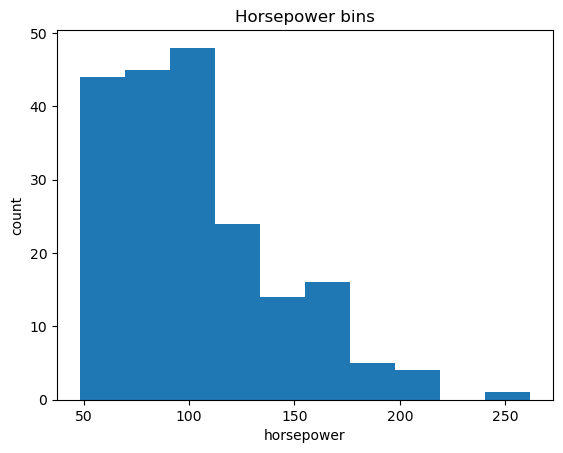

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(df["horsepower"])

plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("Horsepower bins")

Hay que encontrar 3 bins con el mismo ancho de banda. Para ello se emplea:

`linspace(start_value, end_value, numbers_generated)`.

Se requiere incluir el valor mínimo y el máximo. Dado que se quiere construir tres bins, se necesitan 4 divisores.

In [43]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [44]:
group_names = ["Low", "Medium","High"]

In [45]:
df["horsepower-binned"] = pd.cut(df["horsepower"], bins, labels=group_names, include_lowest=True)
df[["horsepower", "horsepower-binned"]].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [46]:
df["horsepower-binned"].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

Text(0.5, 1.0, 'Horsepower - Bins')

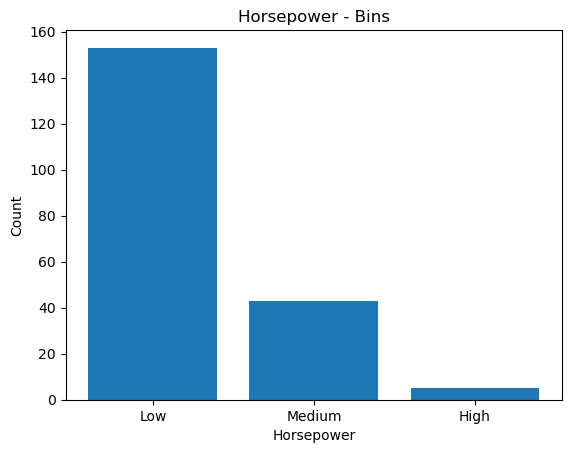

In [51]:
plt.bar(group_names, df["horsepower-binned"].value_counts())
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horsepower - Bins")

Text(0.5, 1.0, 'horsepower bins')

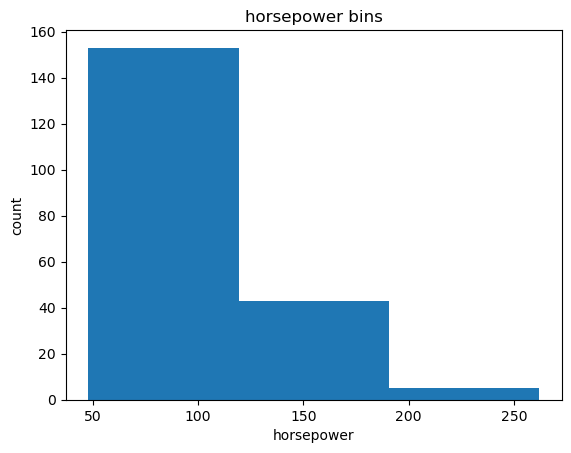

In [52]:
plt.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

## **6. Indicador de variable (dummy variable)**

**Ejemplo:** La columna "fuel-type" tiene dos únicos valores "gas" o "diesel".

In [53]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [54]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [56]:
dummy_variable_1.rename(columns = {"gas":"fuel-type-gas", "diesel":"fuel-type-diesel"}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [57]:
df = pd.concat([df, dummy_variable_1], axis=1)

df.drop("fuel-type", axis=1, inplace=True)

In [58]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,False,True
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,False,True
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,False,True
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,False,True


In [60]:
df["aspiration"].value_counts()

aspiration
std      165
turbo     36
Name: count, dtype: int64

In [63]:
dummy_variable_2 = pd.get_dummies(df["aspiration"])

In [64]:
dummy_variable_2.rename(columns = {"std":"aspiration-std", "turbo":"aspiration-turbo"}, inplace=True)

In [65]:
df = pd.concat([df, dummy_variable_2], axis=1)

df.drop("aspiration", axis=1, inplace=True)

In [66]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Low,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,False,True,True,False


In [67]:
df.to_csv("clean_df.csv")